# Crawling Berita

In [ ]:
#melakukan web scraping pada halaman berita yang berasal dari URL
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.bbc.com/indonesia/articles/cxrvr59632eo"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="bbc-1cvxiy9")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Apa tujuan akhir invasi darat Israel ke Gaza?
Sumber gambar, ReutersKeterangan gambar, Militer Israel telah memanggil sejumlah tentara cadangan untuk bertempur melawan Hamas.1 November 2023Paul KirbyBBC NewsPara pemimpin Israel telah menegaskan bahwa kelompok milisi Palestina, Hamas, akan dimusnahkan dari muka bumi dan Gaza tidak akan pernah kembali seperti semula.“Setiap anggota Hamas adalah orang mati,” kata Perdana Menteri Benjamin Netanyahu setelah kelompok milisi tersebut membunuh lebih dari 1.300 orang dalam serangan yang tak terduga ke Israel pada 7 Oktober.Tujuan Operasi Pedang Besi – operasi serangan balasan Israel atas serangan Hamas – nampaknya jauh lebih ambisius dibandingkan apa pun yang direncanakan militer Israel di Gaza sebelumnya.
Lewatkan Artikel-artikel yang direkomendasikan dan terus membacaArtikel-artikel yang direkomendasikanPalestina: RS Indonesia di Gaza terancam berhenti beroperasiSiapa saja para pimpinan penting Hamas?Gaza: Serangan terhadap konvoi kendaraan w

In [ ]:
#menghitung dan mencetak nilai TF-IDF (Term Frequency-Inverse Document Frequency)
#untuk setiap kata dalam setiap kalimat dari teks yang telah di-tokenisasi sebelumnya.
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: Apa tujuan akhir invasi darat Israel ke Gaza?
akhir: 0.4459
apa: 0.3830
darat: 0.3383
gaza: 0.2212
invasi: 0.4113
israel: 0.1960
ke: 0.3383
tujuan: 0.4113

Kalimat 2: Sumber gambar, ReutersKeterangan gambar, Militer Israel telah memanggil sejumlah tentara cadangan untuk bertempur melawan Hamas.1 November 2023Paul KirbyBBC NewsPara pemimpin Israel telah menegaskan bahwa kelompok milisi Palestina, Hamas, akan dimusnahkan dari muka bumi dan Gaza tidak akan pernah kembali seperti semula.“Setiap anggota Hamas adalah orang mati,” kata Perdana Menteri Benjamin Netanyahu setelah kelompok milisi tersebut membunuh lebih dari 1.300 orang dalam serangan yang tak terduga ke Israel pada 7 Oktober.Tujuan Operasi Pedang Besi – operasi serangan balasan Israel atas serangan Hamas – nampaknya jauh lebih ambisius dibandingkan apa pun yang direncanakan militer Israel di Gaza sebelumnya.
2023paul: 0.1173
300: 0.1173
adalah: 0.0761
akan: 0.1357
ambisius: 0.1173
anggota: 0.1040
apa: 0.0812
atas: 0.

In [ ]:
#menghitung kemiripan kosinus (cosine similarity) antara dua kalimat berdasarkan vektor representasi TF-IDF dari masing-masing kalimat.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


In [ ]:
#menghitung dan mencetak kemiripan kosinus (cosine similarity) antara semua pasangan kalimat dalam teks yang telah di-tokenisasi

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


In [ ]:
#membuat dan mencetak DataFrame menggunakan hasil perhitungan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi dan matriks TF-IDF
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


In [ ]:
#membuat dan menampilkan grafik matriks yang menggambarkan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
#membangun sebuah graf yang merepresentasikan hubungan antara kalimat dalam teks berdasarkan kemiripan (similarity) antara kalimat-kalimat tersebut.
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0.2:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {centrality:.4f}")


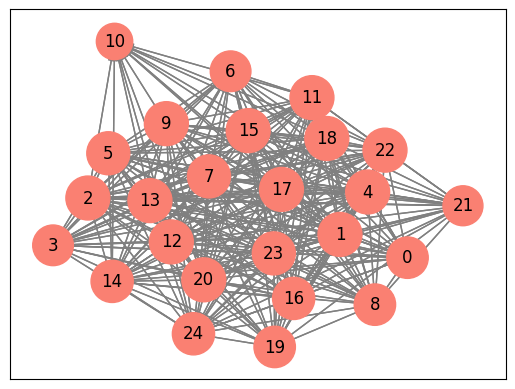

Closeness Centrality (Dari Tertinggi ke Terendah):
Node 1: Closeness Centrality 1.0000
Kalimat: Sumber gambar, ReutersKeterangan gambar, Militer Israel telah memanggil sejumlah tentara cadangan untuk bertempur melawan Hamas.1 November 2023Paul KirbyBBC NewsPara pemimpin Israel telah menegaskan bahwa kelompok milisi Palestina, Hamas, akan dimusnahkan dari muka bumi dan Gaza tidak akan pernah kembali seperti semula.“Setiap anggota Hamas adalah orang mati,” kata Perdana Menteri Benjamin Netanyahu setelah kelompok milisi tersebut membunuh lebih dari 1.300 orang dalam serangan yang tak terduga ke Israel pada 7 Oktober.Tujuan Operasi Pedang Besi – operasi serangan balasan Israel atas serangan Hamas – nampaknya jauh lebih ambisius dibandingkan apa pun yang direncanakan militer Israel di Gaza sebelumnya.

Node 2: Closeness Centrality 1.0000
Kalimat: Lewatkan Artikel-artikel yang direkomendasikan dan terus membacaArtikel-artikel yang direkomendasikanPalestina: RS Indonesia di Gaza terancam berh

In [ ]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
!!node_size = [v * 1000 for v in closeness_centrality.values() if v > 0.2]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran
# pilih_node = [node for node, v in closeness_centrality.items() if v > 0.2]

# subgraph = G.subgraph(pilih_node)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='salmon')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality dari yang tertinggi hingga terendah
print("Closeness Centrality (Dari Tertinggi ke Terendah):")
!!sorted_closeness = sorted([(node, closeness) for node, closeness in closeness_centrality.items() if closeness > 0.2], key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: Closeness Centrality {closeness:.4f}")
    print(f"Kalimat: {sentence}")
    print()